# **Analysis of sales**

### 1- Import libraries and load dataset

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data/raw/Walmart Data Analysis and Forcasting.csv")
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.57,211.10,8.11
1,1,12-02-2010,1641957.44,1,38.51,2.55,211.24,8.11
2,1,19-02-2010,1611968.17,0,39.93,2.51,211.29,8.11
3,1,26-02-2010,1409727.59,0,46.63,2.56,211.32,8.11
4,1,05-03-2010,1554806.68,0,46.50,2.62,211.35,8.11


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


### 2- Preprocessing: Inspect and clean data

In [ ]:
# Inspect null values in the dataset
df.isnull().sum()

,0
Store,0
Date,0
Weekly_Sales,0
Holiday_Flag,0
Temperature,0
Fuel_Price,0
CPI,0
Unemployment,0


In [4]:
# Check the duplicates in the dataset
df.duplicated().sum()

0

In [5]:
#Check if the Holiday_Flag is only binary (if it is holiday sales or not. if yes: 1, otherwise: 0)
df['Holiday_Flag'].unique()

array([0, 1])

In [6]:
# The statistical distribution of numerical variables in the dataset
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


### 3- Key Performance Indicators (KPI) and visualization

####3-1 Total Sales per store

In [21]:
total_sale_per_store= df.groupby('Store')['Weekly_Sales'].sum().reset_index()
total_sale_per_store.columns=['Store','Total_Sales']
pd.set_option('display.float_format', '{:.2f}'.format)
# Sort the DataFrame by Total_Sales in descending order
total_sale_per_store = total_sale_per_store.sort_values(by='Total_Sales', ascending=False)
total_sale_per_store.head()

,Store,Total_Sales
19,20,301397792.46
3,4,299543953.38
13,14,288999911.34
12,13,286517703.80
1,2,275382440.98


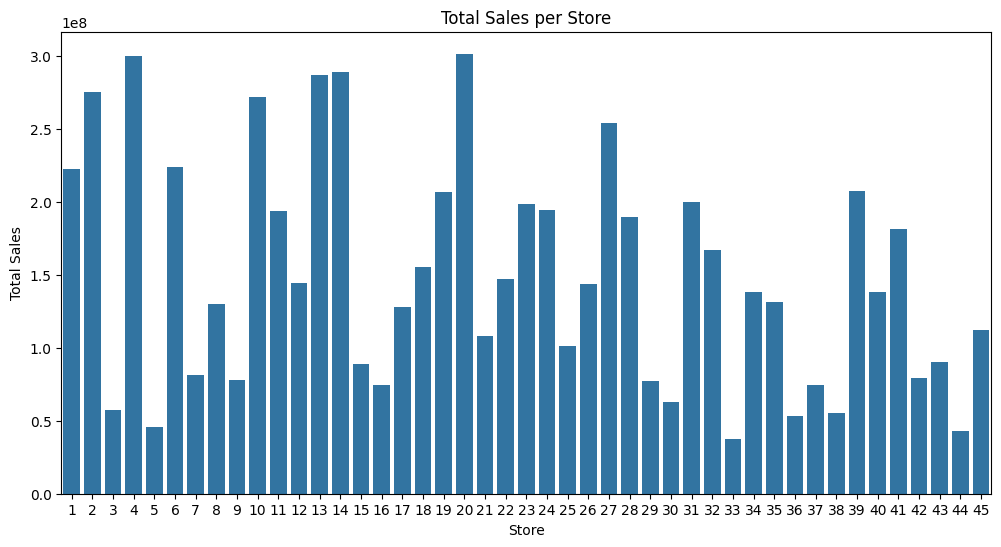

In [22]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Store', y='Total_Sales', data=total_sale_per_store)
plt.xlabel('Store')
plt.ylabel('Total Sales')
plt.title('Total Sales per Store')
plt.show()

####3-2 Average weekly sale per store

In [12]:
avg_weekly_sale_per_store=df.groupby('Store')['Weekly_Sales'].mean().reset_index()
avg_weekly_sale_per_store.columns=['Store', 'Average_Weekly_Sales']
# Sort the DataFrame by Total_Sales in descending order
avg_weekly_sale_per_store = avg_weekly_sale_per_store.sort_values(by='Average_Weekly_Sales', ascending=False)
avg_weekly_sale_per_store.head()


,Store,Average_Weekly_Sales
19,20,2107676.87
3,4,2094712.96
13,14,2020978.40
12,13,2003620.31
1,2,1925751.34


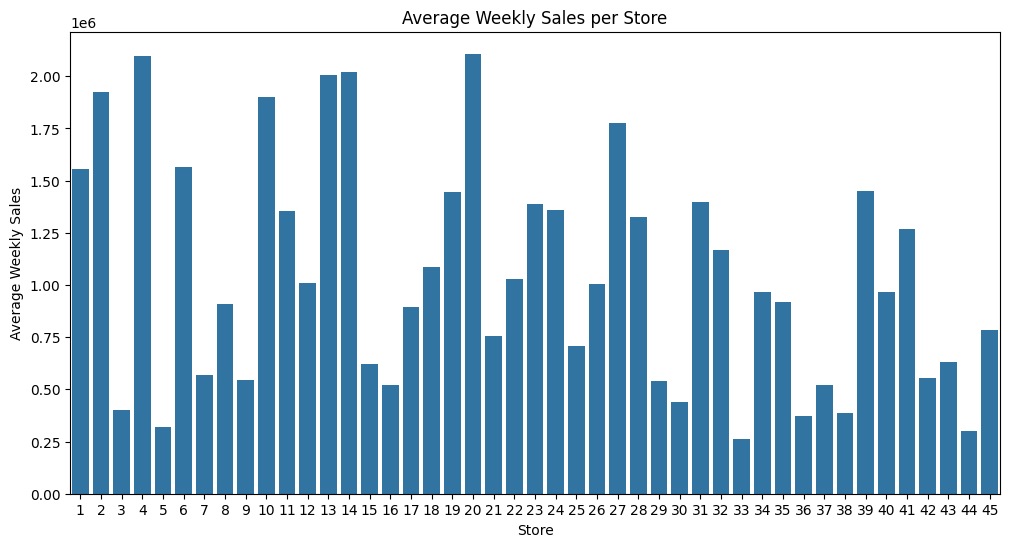

In [23]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Store', y='Average_Weekly_Sales', data=avg_weekly_sale_per_store)
plt.xlabel('Store')
plt.ylabel('Average Weekly Sales')
plt.title('Average Weekly Sales per Store')
plt.show()

#### 3-3 Sales Variability per Store

In [14]:
sales_variability_per_store=df.groupby('Store')['Weekly_Sales'].std().reset_index()
sales_variability_per_store.columns=['Store', 'Sales_Variability']
sales_variability_per_store = sales_variability_per_store.sort_values(by='Sales_Variability', ascending=False)
sales_variability_per_store.head()

,Store,Sales_Variability
13,14,317569.95
9,10,302262.06
19,20,275900.56
3,4,266201.44
12,13,265507.00


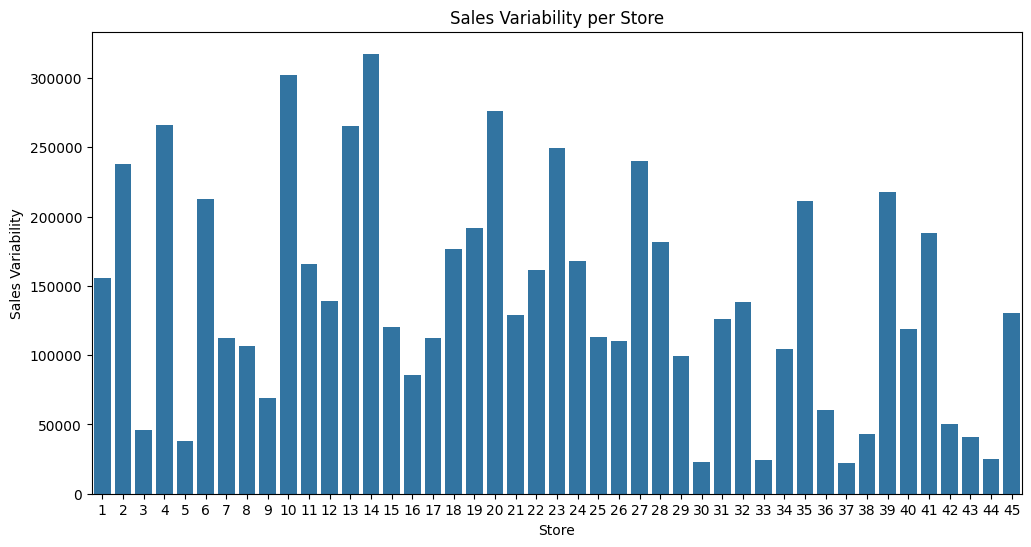

In [24]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Store', y='Sales_Variability', data=sales_variability_per_store)
plt.xlabel('Store')
plt.ylabel('Sales Variability')
plt.title('Sales Variability per Store')
plt.show()

#### 3-4 Sales per Store During Holidays

In [15]:
avg_sales_holiday=df[df['Holiday_Flag']==1].groupby('Store')['Weekly_Sales'].mean().reset_index()
avg_sales_holiday.columns = ['Store', 'Avg_Sales_Holiday']
avg_sales_holiday = avg_sales_holiday.sort_values(by='Avg_Sales_Holiday', ascending=False)

avg_sales_non_holiday = df[df['Holiday_Flag'] == 0].groupby('Store')['Weekly_Sales'].mean().reset_index()
avg_sales_non_holiday.columns = ['Store', 'Avg_Sales_Non_Holiday']
avg_sales_non_holiday = avg_sales_non_holiday.sort_values(by='Avg_Sales_Non_Holiday', ascending=False)

In [16]:
#average sales on holiday weeks
avg_sales_holiday.head()

,Store,Avg_Sales_Holiday
19,20,2249035.08
3,4,2243102.62
13,14,2120583.00
9,10,2113755.95
12,13,2113043.81


In [17]:
#average sales on non holiday weeks
avg_sales_non_holiday.head()

,Store,Avg_Sales_Non_Holiday
19,20,2097048.43
3,4,2083555.84
13,14,2013489.33
12,13,1995392.98
1,2,1914208.81


<Figure size 1200x600 with 0 Axes>

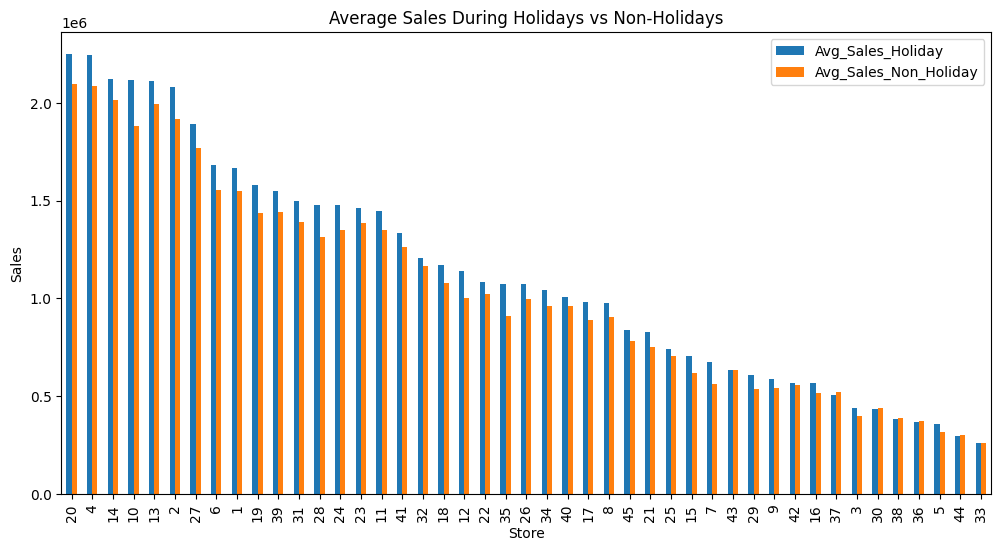

In [25]:
# Merge holiday and non-holiday sales data
holiday_sales = pd.merge(avg_sales_holiday, avg_sales_non_holiday, on='Store')

plt.figure(figsize=(12, 6))
holiday_sales.set_index('Store').plot(kind='bar', figsize=(12, 6))
plt.xlabel('Store')
plt.ylabel('Sales')
plt.title('Average Sales During Holidays vs Non-Holidays')
plt.show()

## 4- Correlation Analysis

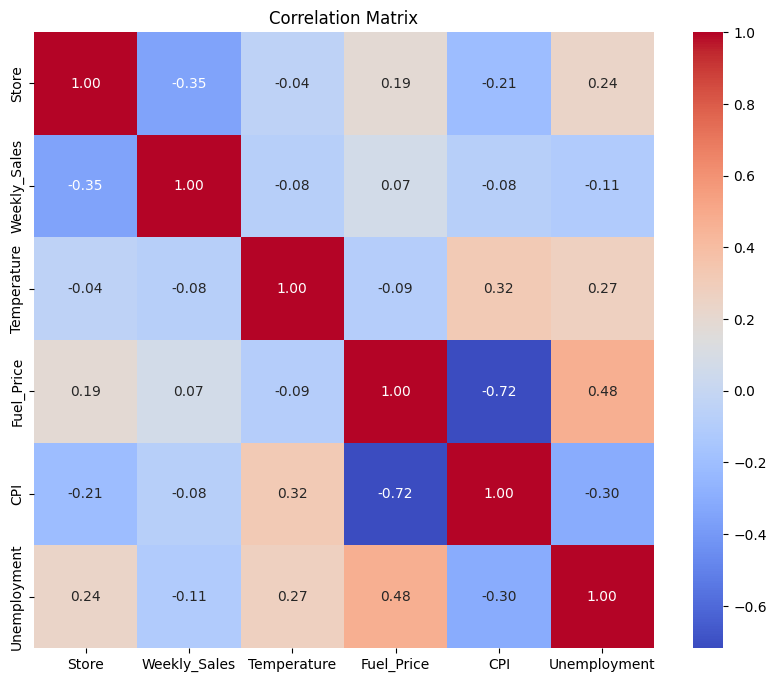

In [26]:
# Calculate correlations between sales and other variables
store_performance = df.groupby('Store').agg({
    'Weekly_Sales': 'mean',
    'Temperature': 'mean',
    'Fuel_Price': 'mean',
    'CPI': 'mean',
    'Unemployment': 'mean'
}).reset_index()

correlations = store_performance.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()